In [ ]:
# Initial Setup.
import pandas as pd
import re
import numpy as np
from readability import Readability
import nltk
nltk.download('punkt')
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:

#Read in cleaned dataset.
file_path=path+ "fraud_hashtag.csv"
data_fraud=pd.read_csv(file_path, index_col=[0],converters={'id':str,'entities':str,'interact_with':str,'author_id':str})
file_path=path+ "qa_hashtag.csv"
data_qa=pd.read_csv(file_path, index_col=[0],converters={'id':str,'entities':str,'interact_with':str,'author_id':str})
file_path=path+ "anti_hashtag.csv"
data_anti=pd.read_csv(file_path, index_col=[0],converters={'id':str,'entities':str,'interact_with':str,'author_id':str})
file_path=path+ "mm_hashtag.csv"
data_mm=pd.read_csv(file_path, index_col=[0],converters={'id':str,'entities':str,'interact_with':str,'author_id':str})
file_path=path+ "mt_hashtag.csv"
data_mt=pd.read_csv(file_path, index_col=[0],converters={'id':str,'entities':str,'interact_with':str,'author_id':str})
file_path=path+ "blm_hashtag.csv"
data_blm=pd.read_csv(file_path, index_col=[0],converters={'id':str,'entities':str,'interact_with':str,'author_id':str})

In [ ]:
# Clean the text.
def cleaner(x):
    import re
    x = re.sub(r'http\S+', '', x)
    x = re.sub('\n', '',x)
    x = re.sub("@[A-Za-z0-9_]+","", x)
    x=re.sub(r'^RT ', '', x)
    x = re.sub("#[A-Za-z0-9_]+","", x)
    #x = re.sub(r'[^\w\s]', '', x)
    #import nltk
    #from nltk.corpus import stopwords
    #words = nltk.word_tokenize(x)
    # Remove stopwords
    #stop_words = set(stopwords.words('english'))
    #words = [word for word in words if word.lower() not in stop_words]
    #from gensim.parsing.preprocessing import remove_stopwords
    #x = remove_stopwords(x)
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U0001F1F2-\U0001F1F4"  # Macau flag
        u"\U0001F1E6-\U0001F1FF"  # flags
        u"\U0001F600-\U0001F64F"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U0001F1F2"
        u"\U0001F1F4"
        u"\U0001F620"
        u"\u200d"
        u"\u2640-\u2642"
        "]+", flags=re.UNICODE)

    x = emoji_pattern.sub(r'', x)
    x = x.lower()
    #import emoji
    #cleaned = emoji.get_emoji_regexp().sub("", x)
    return x

In [ ]:
data_fraud['text_cleaned']=data_fraud['text'].apply(cleaner)
data_qa['text_cleaned']=data_qa['text'].apply(cleaner)
data_anti['text_cleaned']=data_anti['text'].apply(cleaner)
data_mm['text_cleaned']=data_mm['text'].apply(cleaner)
data_mt['text_cleaned']=data_mt['text'].apply(cleaner)
data_blm['text_cleaned']=data_blm['text'].apply(cleaner)

In [ ]:
data_fraud_ec=data_fraud.loc[data_fraud['cluster']==1]
data_fraud_nec=data_fraud.loc[data_fraud['cluster']==0]

In [ ]:
from tqdm import tqdm
nec_fraud_score=[]
for i in tqdm(range(0,100)):
  data_clustered=data_fraud_nec.sample(n=100)
  joined_text = ' '.join(data_clustered['text_cleaned'])
  score = Readability(joined_text).flesch().score
  nec_fraud_score.append(score)

100%|██████████| 100/100 [00:29<00:00,  3.42it/s]


In [ ]:
ec_fraud_score=[]
for i in tqdm(range(0,100)):
  data_clustered=data_fraud_ec.sample(n=100)
  joined_text = ' '.join(data_clustered['text_cleaned'])
  score = Readability(joined_text).flesch().score
  ec_fraud_score.append(score)

100%|██████████| 100/100 [00:29<00:00,  3.36it/s]


In [ ]:
data_anti_ec=data_anti.loc[data_anti['cluster']==1]
data_anti_nec=data_anti.loc[data_anti['cluster']==0]

In [ ]:

nec_anti_score=[]
for i in tqdm(range(0,100)):
  data_clustered=data_anti_nec.sample(n=100)
  joined_text = ' '.join(data_clustered['text_cleaned'])
  score = Readability(joined_text).flesch().score
  nec_anti_score.append(score)

100%|██████████| 100/100 [00:22<00:00,  4.52it/s]


In [ ]:
ec_anti_score=[]
for i in tqdm(range(0,100)):
  data_clustered=data_anti_ec.sample(n=100)
  joined_text = ' '.join(data_clustered['text_cleaned'])
  score = Readability(joined_text).flesch().score
  ec_anti_score.append(score)

100%|██████████| 100/100 [00:19<00:00,  5.14it/s]


In [ ]:
data_qa_ec=data_qa.loc[data_qa['cluster']==1]
data_qa_nec=data_qa.loc[data_qa['cluster']==0]

In [ ]:
from tqdm import tqdm
nec_qa_score=[]
for i in tqdm(range(0,100)):
  data_clustered=data_qa_nec.sample(n=100)
  joined_text = ' '.join(data_clustered['text_cleaned'])
  score = Readability(joined_text).flesch().score
  nec_qa_score.append(score)

100%|██████████| 100/100 [00:18<00:00,  5.46it/s]


In [ ]:
ec_qa_score=[]
for i in tqdm(range(0,100)):
  data_clustered=data_qa_ec.sample(n=100)
  joined_text = ' '.join(data_clustered['text_cleaned'])
  score = Readability(joined_text).flesch().score
  ec_qa_score.append(score)

100%|██████████| 100/100 [00:15<00:00,  6.63it/s]


In [ ]:
data_mt_ec=data_mt.loc[data_mt['cluster']==1]
data_mt_nec=data_mt.loc[data_mt['cluster']==0]

In [ ]:
from tqdm import tqdm
nec_mt_score=[]
for i in tqdm(range(0,100)):
  data_clustered=data_mt_nec.sample(n=100)
  joined_text = ' '.join(data_clustered['text_cleaned'])
  score = Readability(joined_text).flesch().score
  nec_mt_score.append(score)

100%|██████████| 100/100 [00:17<00:00,  5.85it/s]


In [ ]:
ec_mt_score=[]
for i in tqdm(range(0,100)):
  data_clustered=data_mt_ec.sample(n=100)
  joined_text = ' '.join(data_clustered['text_cleaned'])
  score = Readability(joined_text).flesch().score
  ec_mt_score.append(score)

100%|██████████| 100/100 [00:13<00:00,  7.67it/s]


In [ ]:
data_mm_ec=data_mm.loc[data_mm['cluster']==1]
data_mm_nec=data_mm.loc[data_mm['cluster']==0]

In [ ]:
from tqdm import tqdm
nec_mm_score=[]
for i in tqdm(range(0,100)):
  data_clustered=data_mm_nec.sample(n=100)
  joined_text = ' '.join(data_clustered['text_cleaned'])
  score = Readability(joined_text).flesch().score
  nec_mm_score.append(score)

100%|██████████| 100/100 [00:15<00:00,  6.52it/s]


In [ ]:
ec_mm_score=[]
for i in tqdm(range(0,100)):
  data_clustered=data_mm_ec.sample(n=100)
  joined_text = ' '.join(data_clustered['text_cleaned'])
  score = Readability(joined_text).flesch().score
  ec_mm_score.append(score)

100%|██████████| 100/100 [00:17<00:00,  5.77it/s]


In [ ]:
data_blm_ec=data_blm.loc[data_blm['cluster']==1]
data_blm_nec=data_blm.loc[data_blm['cluster']==0]

In [ ]:
from tqdm import tqdm
nec_blm_score=[]
for i in tqdm(range(0,100)):
  data_clustered=data_blm_nec.sample(n=100)
  joined_text = ' '.join(data_clustered['text_cleaned'])
  score = Readability(joined_text).flesch().score
  nec_blm_score.append(score)

100%|██████████| 100/100 [00:15<00:00,  6.31it/s]


In [ ]:
ec_blm_score=[]
for i in tqdm(range(0,100)):
  data_clustered=data_blm_ec.sample(n=100)
  joined_text = ' '.join(data_clustered['text_cleaned'])
  score = Readability(joined_text).flesch().score
  ec_blm_score.append(score)

100%|██████████| 100/100 [00:14<00:00,  7.10it/s]


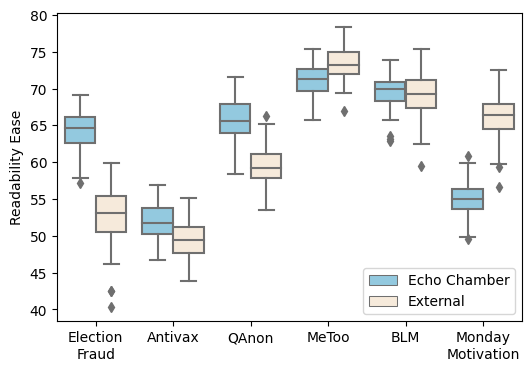

In [ ]:
#plot them together
categories = ["Election\nFraud", "Antivax", "QAnon","MeToo","BLM", "Monday\nMotivation"]
list1_data = [ec_fraud_score, ec_anti_score, ec_qa_score,ec_mt_score,ec_blm_score, ec_mm_score]
list2_data = [nec_fraud_score, nec_anti_score, nec_qa_score,nec_mt_score,nec_blm_score, nec_mm_score]

data_list1 = pd.DataFrame(list1_data, index=categories).T.melt(var_name="", value_name="Readability Ease")
data_list1['Group'] = 'Echo Chamber'
data_list2 = pd.DataFrame(list2_data, index=categories).T.melt(var_name="", value_name="Readability Ease")
data_list2['Group'] = 'External'

data_combined = pd.concat([data_list1, data_list2])

colors = {"Echo Chamber": "skyblue", "External": "antiquewhite"}


plt.figure(figsize=(6, 4))
sns.boxplot(data=data_combined, x="", y="Readability Ease", hue="Group", palette=colors)



plt.legend(loc="lower right")
plt.show()



In [ ]:
from scipy.stats import ttest_ind


t_test_results = []
for list1, list2 in zip(list1_data, list2_data):
    t_stat, p_value = ttest_ind(list1, list2)
    t_test_results.append((t_stat, p_value))

t_test_results

[(25.24877036794616, 8.095699372206065e-64),
 (7.145154738111515, 1.6829415805133732e-11),
 (15.902559518126603, 3.1165544997396394e-37),
 (-7.131002945948962, 1.826481359114465e-11),
 (1.647135281886703, 0.10111636677886253),
 (-30.845856618508616, 1.494046814462254e-77)]